<a href="https://colab.research.google.com/github/LoganReyn/ML_Notebooks/blob/main/FashionMINST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiclass Image Classification Using a Convolutional Neural Network
Cody & Logan \
Professor Gogolin \
ARTI 450: Deep Learning

**Goal**:


*   Train CNN on image dataset to classify images



**Resources**:

*   [uCertify Traffic Sign Classification](https://www.ucertify.com/app/?func=ebook&chapter_no=13#07ZXx)

* [Example Notebook From Kaggle](https://www.kaggle.com/code/scratchpad/notebook5ea45841c6/edit)

### Libraries

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

## Fashion-MNIST dataset
Label	Description
0.	T-shirt/top
1.	Trouser
2.	Pullover
3.	Dress
4.	Coat
5.	Sandal
6.	Shirt
7.	Sneaker
8.	Bag
9.	Ankle boot

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


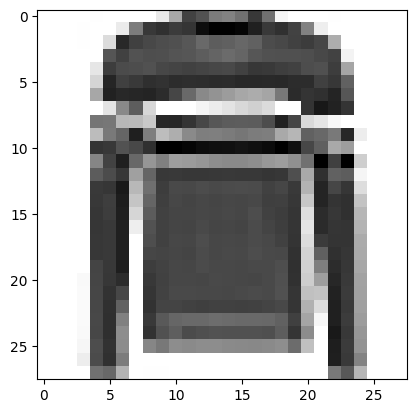

In [ ]:
plt.imshow(X_train[5], cmap=plt.cm.binary)

In [ ]:
print(y_train[5])

2


Reshaping the dataset

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
# reshaping the dataset to fit the CNN.
# original is 60_000 x 28 x 28
# adding the extra channel is for the intensity of light since black and white
# image if it was RGB, it would be ([0], 28, 28, 3)

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [ ]:
X_train.shape

(60000, 28, 28, 1)

Normalizing Pixel Values

In [ ]:
print(f"[{X_train[0].min()} - {X_train[0].max()}]")

[0 - 255]


In [ ]:
# Many benifits to normalize

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [ ]:
print(f"[{X_train[0].min()} - {X_train[0].max()}]")

[0.0 - 1.0]


Definition of Model

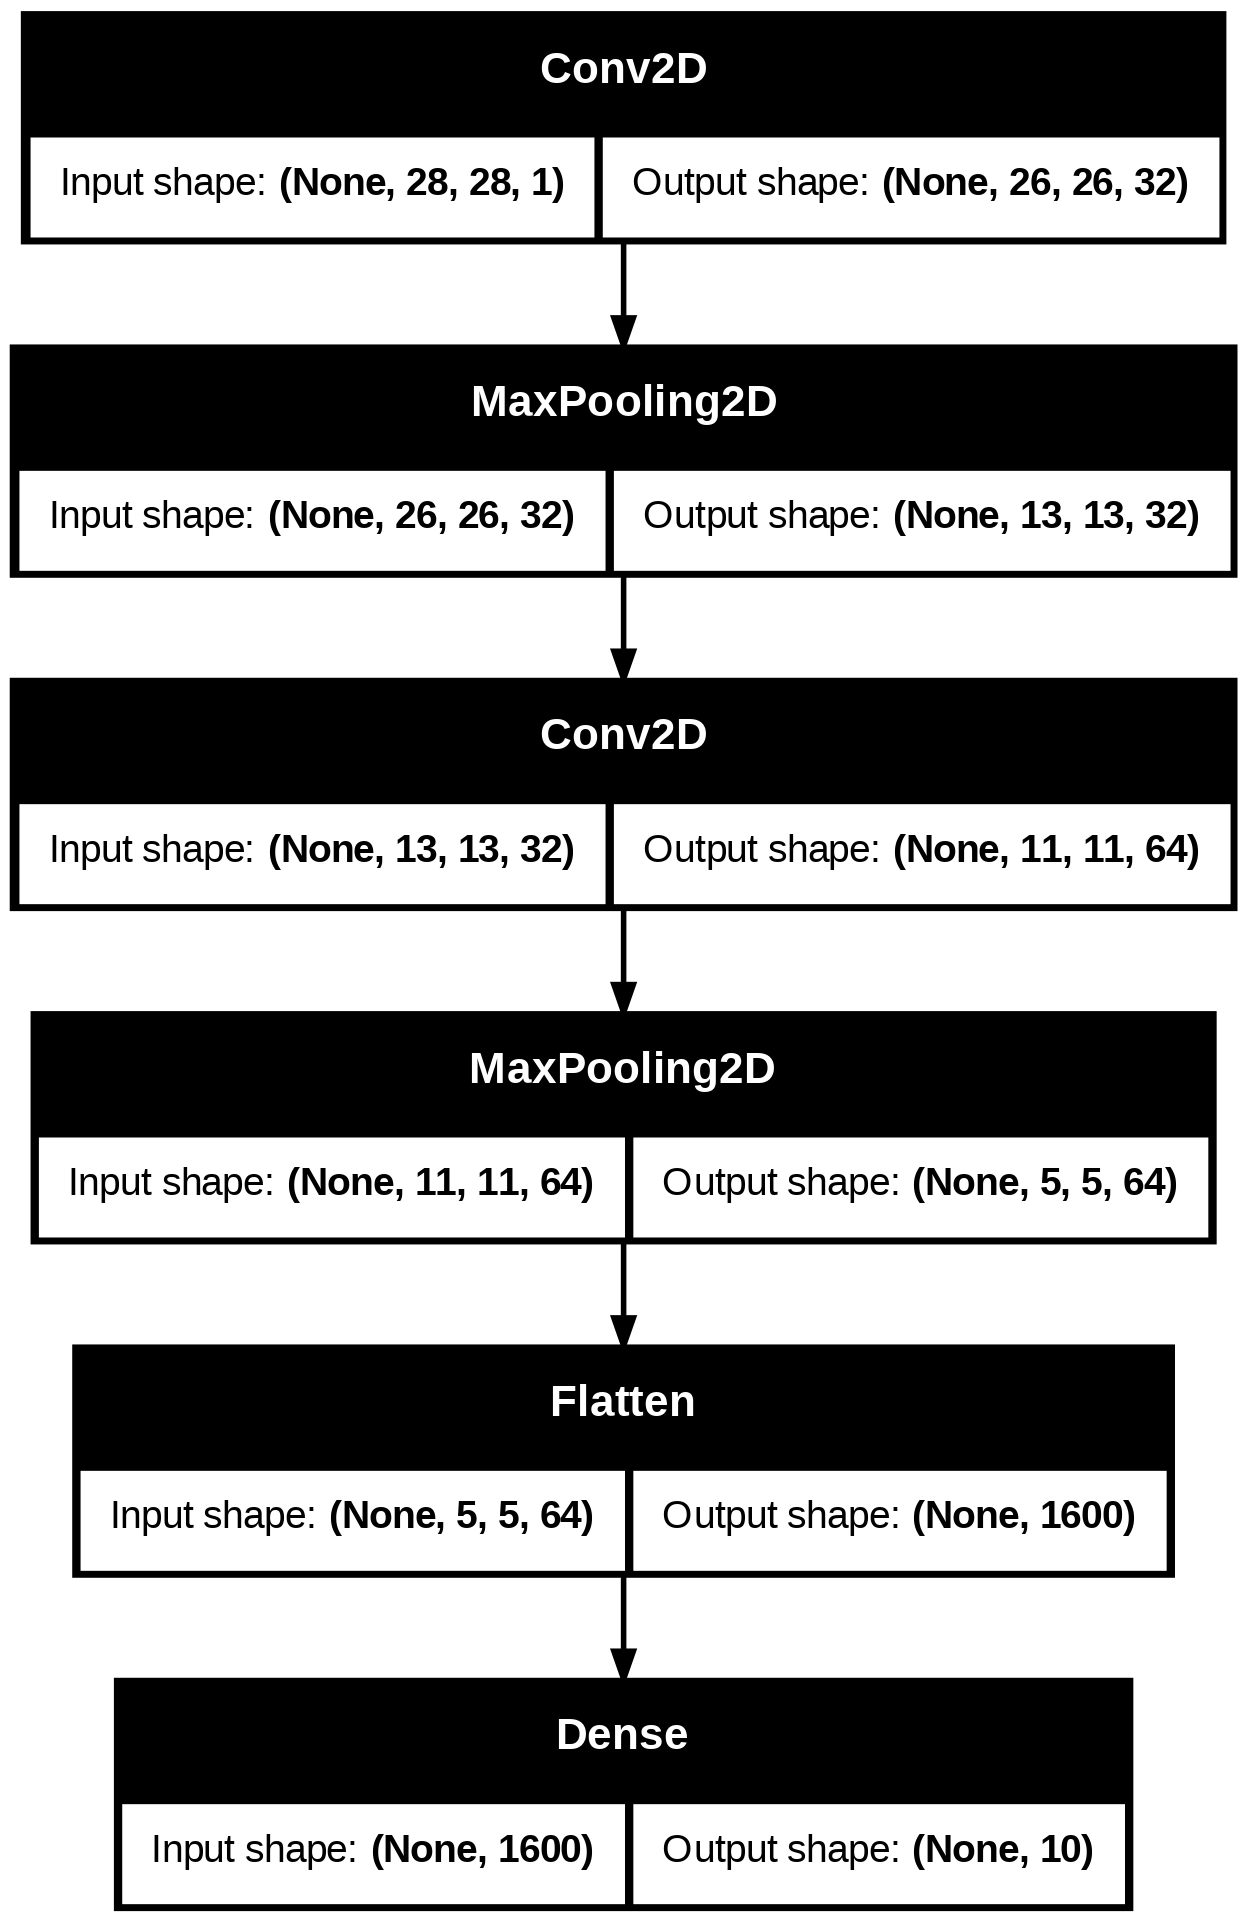

In [ ]:
# Still trying to understand all these things

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)), # creates a feature map
  tf.keras.layers.MaxPooling2D((2, 2)), # simplify feature map
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'), # another feature map of simplified
  tf.keras.layers.MaxPooling2D((2, 2)), # simplify the simplified?
  tf.keras.layers.Flatten(), # flatten into 1D for Dense layer
  tf.keras.layers.Dense(10, activation='softmax') # softmax 0 to 1 for classification
])

# show the model
tf.keras.utils.plot_model(model, show_shapes=True)

Compiling Model

In [ ]:
model.compile(optimizer='adam', # updates weights and biases during training to minimize loss function
               loss='sparse_categorical_crossentropy', # measure error between prediction and actual
               metrics=['accuracy'])

Fitting Model on Training Data

In [ ]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 31ms/step - accuracy: 0.7631 - loss: 0.6649
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 89s 35ms/step - accuracy: 0.8790 - loss: 0.3401
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 37ms/step - accuracy: 0.8928 - loss: 0.2942
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 34ms/step - accuracy: 0.9063 - loss: 0.2605
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 31ms/step - accuracy: 0.9124 - loss: 0.2415
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.9184 - loss: 0.2256
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.9238 - loss: 0.2083
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 31ms/step - accuracy: 0.9298 - loss: 0.1934
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 32ms/step - accuracy: 0.9362 - loss: 0.1792
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.9385 - loss: 0.1718


In [ ]:
# Results with test partition

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)


313/313 - 4s - 12ms/step - accuracy: 0.9064 - loss: 0.2658


CNN Model achieved 90.64% Accuracy on the testing partition after 10 epochs.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted class: 9


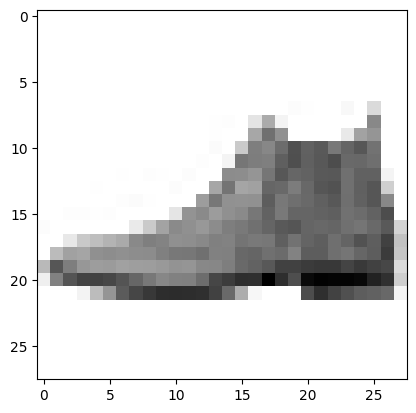

In [ ]:
# Single Prediction

prediction = model.predict(X_test[0].reshape(1, 28, 28, 1))
predicted_class = prediction.argmax()

print(f"Predicted class: {predicted_class}")
plt.imshow(X_test[0], cmap=plt.cm.binary)
plt.show()
